In [1]:
"""
Initializers: https://keras.io/api/layers/initializers/
"""

'\nInitializers: https://keras.io/api/layers/initializers/\n'

In [2]:
#Adding libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

from IPython.display import clear_output

In [3]:
# User Libraries
import Functions, Graphs, Ctes, Metricas_error, Callbacks

In [4]:
path='/home/alejandro/Master Energías Renovables/Tesis Ale/4 - Dataset de prueba/'
df = pd.read_excel(path+'datasetTestThesis2.xlsx')

In [5]:
df.head()

date  wind speed
0  200408171630       11.47
1  200408171640       11.23
2  200408171650       11.18
3  200408171700       10.65
4  200408171710       10.61

In [6]:
# Create matrix with given parameters
mat = Functions.createMatrix(columnName=Ctes.COLUMN_NAME,
                                data=df,
                                regressorVariables=Ctes.REGRESSOR_VARIABLES,
                                timestamp_K=Ctes.TIMESTAMP_K,
                                timeLag=Ctes.TIME_LAG) # Funciona OK!

ERROR:  90982


In [7]:
# Convert matrix into a dataframe
df_final = pd.DataFrame(mat)

In [8]:
df_final.head()

0      1      2      3      4      5
0  11.47  11.23  11.18  10.65  10.61  10.44
1  11.23  11.18  10.65  10.61  10.44  10.03
2  11.18  10.65  10.61  10.44  10.03  10.34
3  10.65  10.61  10.44  10.03  10.34   9.70
4  10.61  10.44  10.03  10.34   9.70   9.98

In [9]:
#Prepare training data
x_train, y_train = Functions.getTrainData(df_final) # Divido las columnas del df en X e Y train

In [10]:
print(x_train.head(),"\n")
print(y_train.head())

       0      1      2      3      4
0  11.47  11.23  11.18  10.65  10.61
1  11.23  11.18  10.65  10.61  10.44
2  11.18  10.65  10.61  10.44  10.03
3  10.65  10.61  10.44  10.03  10.34
4  10.61  10.44  10.03  10.34   9.70 

0    10.44
1    10.03
2    10.34
3     9.70
4     9.98
Name: 5, dtype: float64


In [11]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=Ctes.TEST_SIZE,random_state=Ctes.RANDOM_STATE)

In [12]:
# Transform Pandas objects to TensorFlow object
xnorm = StandardScaler()
ynorm = StandardScaler()
x_train=xnorm.fit_transform(x_train)
x_test=xnorm.fit_transform(x_test)
y_train=ynorm.fit_transform(np.array(y_train).reshape(-1,1))
y_test=ynorm.fit_transform(np.array(y_test).reshape(-1,1))

In [13]:
# Create the arquitecture of the model
# ¿Cuantas hidden layer usamos? --> [5,3], subtipo 2, 3 y 4
# ¿Modelo de activación "relu"? --> relu esta bien, probar sigmoid o tang hip

model = Sequential()
for i in range(len(Ctes.LAYERS)):
    kernelInitializer = initializers.RandomNormal(stddev=1.0, seed=None)
    biasInitializer = initializers.Zeros()
    model.add(Dense(units=Ctes.LAYERS[i], kernel_initializer=kernelInitializer, bias_initializer=biasInitializer, activation=Ctes.ACT_FUNC))
model.add(Dense(1))

In [14]:
    # w_init = tf.random_normal_initializer()
    # w = tf.Variable(initial_value=w_init(shape=(1, Ctes.LAYERS[i]), dtype="float32"), trainable=True)

    # b_init = tf.zeros_initializer()
    # b = tf.Variable(initial_value=b_init(shape=(Ctes.LAYERS[i],), dtype="float32"), trainable=True)

In [15]:
# Compile the model
# ¿Que optimizador y loss se usan? --> Adam

model.compile(loss=Ctes.LOSS, optimizer=tf.keras.optimizers.RMSprop(lr=0.05))

#model.compile(optimizer=Ctes.OPTIMIZER, loss=Ctes.LOSS, metrics=Ctes.METRICS)

In [16]:
# Training the model
# ¿Usamos data de validación? --> Se podría utilizar pero ver el tiempo de proceso. Base de datos chica, no conviene.
# 100 Epochs

history = model.fit(x_train,y_train,epochs=100,batch_size=Ctes.BATCH_SIZE,callbacks=[Callbacks.StopAtMinLoss(patience=10)], verbose=0) #, validation_split=0.2)


La perdida promedio para la epoch 0 es 0.0665.
Se encontró un nuevo mínimo. Esperando 10 epochs sin nuevos mínimos.

La perdida promedio para la epoch 1 es 0.0505.
Se encontró un nuevo mínimo. Esperando 10 epochs sin nuevos mínimos.

La perdida promedio para la epoch 2 es 0.0464.
Se encontró un nuevo mínimo. Esperando 10 epochs sin nuevos mínimos.

La perdida promedio para la epoch 3 es 0.0451.
Se encontró un nuevo mínimo. Esperando 10 epochs sin nuevos mínimos.

La perdida promedio para la epoch 4 es 0.0443.
Se encontró un nuevo mínimo. Esperando 10 epochs sin nuevos mínimos.

La perdida promedio para la epoch 5 es 0.0440.
Se encontró un nuevo mínimo. Esperando 10 epochs sin nuevos mínimos.

La perdida promedio para la epoch 6 es 0.0436.
Se encontró un nuevo mínimo. Esperando 10 epochs sin nuevos mínimos.

La perdida promedio para la epoch 7 es 0.0431.
Se encontró un nuevo mínimo. Esperando 10 epochs sin nuevos mínimos.

La perdida promedio para la epoch 8 es 0.0433.
La perdida promed

In [17]:
# Prediction
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

y_PRED = ynorm.inverse_transform(trainPredict)
x_PRED = ynorm.inverse_transform(testPredict)
y_TEST = ynorm.inverse_transform(y_test)

PlotActualVsPred


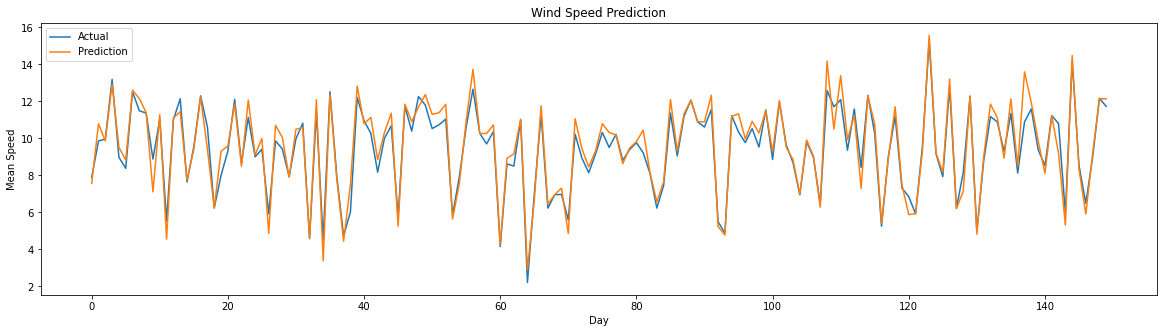

In [18]:
Graphs.PlotActualVsPred(y_TEST, x_PRED)

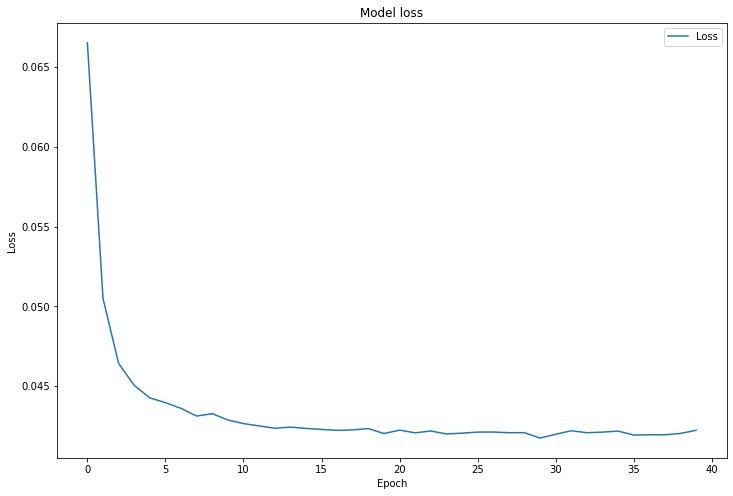

In [19]:
Graphs.PlotLearningCurve(history)

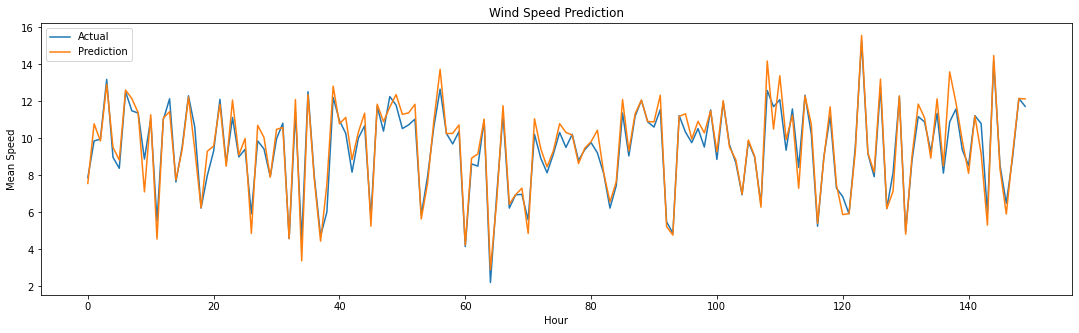

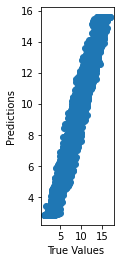

In [21]:
Graphs.PlotScatterActualPred(y_TEST, x_PRED)

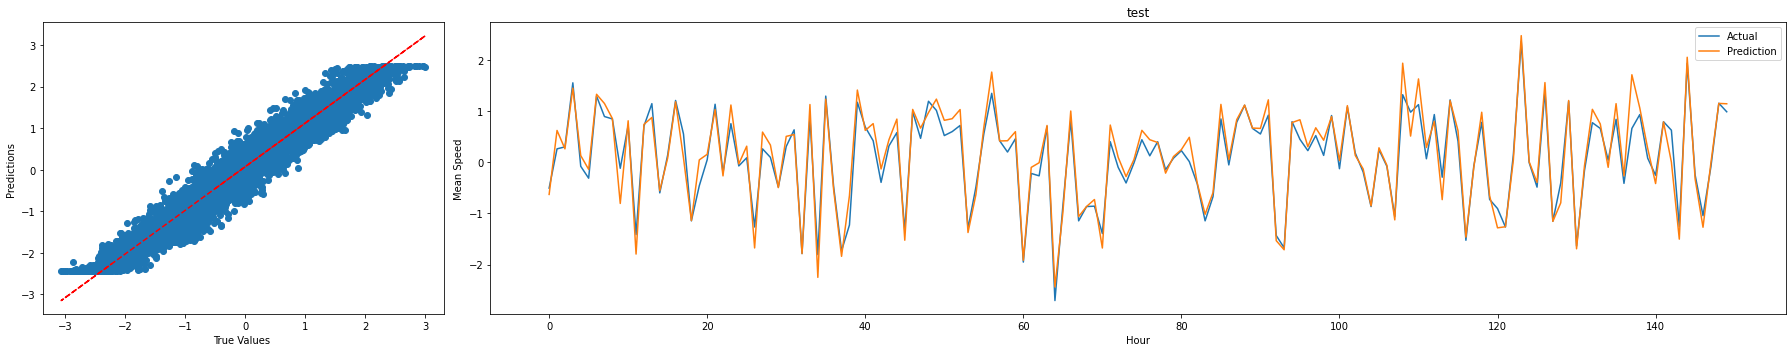

In [65]:
grid = plt.GridSpec(1, 4)

rango=150

# First plot
plt.figure(figsize=(25,5))
plt.subplot(grid[0, 1:])
plt.plot(y_test[:rango], label='Actual')
plt.plot(testPredict[:rango], label='Prediction')
plt.xlabel('Hour')
plt.ylabel('Mean Speed')
plt.title('test')
plt.legend()

# Second plot
plt.subplot(grid[0, 0])
g=plt.scatter(y_test, testPredict)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
x = [l[0] for l in y_test]
y = [l[0] for l in testPredict]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.tight_layout()
plt.show()

In [1]:
import Graphs

In [2]:

x = [[0],[1],[2],[3],[4],[5]]
y = [[1],[4],[2],[5],[3],[6]]
class z:
    history={'loss':[1,2,3,4,5]}

In [3]:
plots = Graphs.Plots()

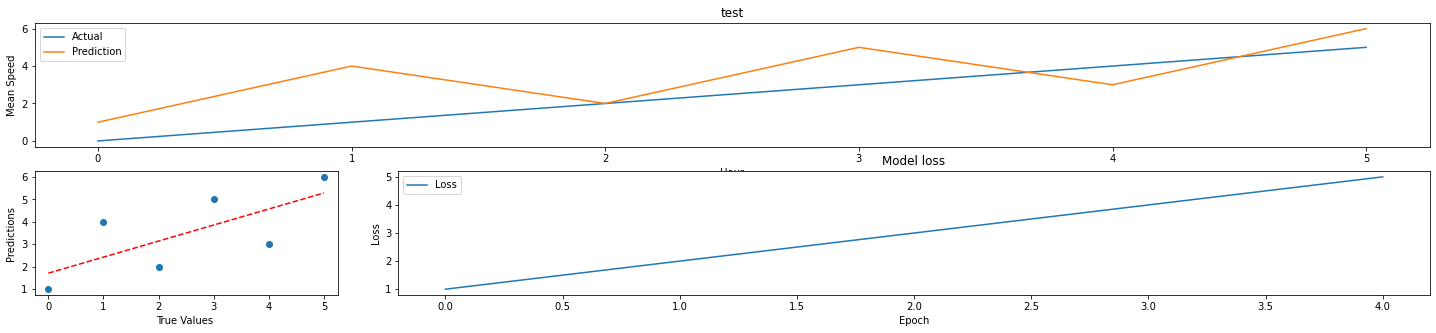

/home/alejandro/Master Energías Renovables/Tesis Ale/6 - Python/Graphs.py:118: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


<Figure size 432x288 with 0 Axes>

In [4]:
plots.PlotAll(x,y,z)